# Jupyter / IPython sihirli ifadeler

Jupyter Jupyter olmadan önce (yani birçok farklı dil çekirdeğiyle uyumlu bir arayüz haline gelmeden önce) _IPython Notebook_ olarak biliniyordu. IPython bir Python yorumlayıcısı, ama özellikle etkileşimli sayısal hesaplamalar gözetilerek hazırlanmış bir yorumlayıcı. Başta sadece terminalde çalışıyordu, daha sonra Web teknolojileriyle birleştirilerek tarayıcı içinde kullanılabilen bir _defter_ yapısına kavuştu. 

[Geçmiş bir yazıda bahsettiğimiz](http://www.veridefteri.com/2017/10/30/jupyter-notebook-nedir-2/) _Jupyter_ arayüzünün özellikleri doğrudan doğruya _IPython_'dan alınmış, ve yorumlanabilir herhangi bir dille çalışabilecek şekilde genelleştirilmiştir. _Jupyter_'in devraldığı _IPython_ özelliklerinden biri de **sihirli ifadeler** denen bazı kolaylaştırıcı, özelleşmiş komutlardır. Bu komutlar `!`, `%` veya `%%` ile başlarlar. Sihirli ifadeler Python yorumlayıcısına aktarılmadan _IPython_ tarafından işlenir.

Sihirli ifadeler IPython çekirdeğine özgü oldukları için sadece Python ile çalışırlar. Jupyter'in desteklediği diğer diller (R, Julia, vd.) şimdilik bu özelliğe sahip değiller.

Sihirli ifadelerle ilgili tam referans için [resmi belgelere bakabilirsiniz.](http://ipython.readthedocs.io/en/stable/interactive/magics.html) Bu yazıda bazı en yaygın kullanılan komutlara göz atacağız.

## Sistem komutu çalıştırmak

İşletim sisteminin komut yorumlayıcısına doğrudan erişmek için `!` sihrini kullanırız. Bu komutların cevabı ekrana yazılır. (Dikkat: Aşağıdaki örnekler bir Linux sisteminde çalışır. Windows veya MacOS'da çalışıyorsanız, sisteminizdeki kabuğa uygun komutlar denemelisiniz.)

Tarih ve saat:

In [1]:
!date

Pzt Kas 20 19:58:15 +03 2017


`ls` ile `\bin` dizininde b ile başlayan dosyaları görelim.

In [2]:
!ls /bin/b*

/bin/bash     /bin/bzcat   /bin/bzegrep  /bin/bzgrep	    /bin/bzless
/bin/bunzip2  /bin/bzcmp   /bin/bzexe	 /bin/bzip2	    /bin/bzmore
/bin/busybox  /bin/bzdiff  /bin/bzfgrep  /bin/bzip2recover


Bu komutların çıktılarını, daha sonra kullanmak için bir değişkene atayabiliriz. Bu şekilde, komut satırında kolayca yapılabilecek bir iş için kod yazmak zorunda kalmayız.

In [3]:
bindosyalar = !ls /bin/b*
bindosyalar

['/bin/bash',
 '/bin/bunzip2',
 '/bin/busybox',
 '/bin/bzcat',
 '/bin/bzcmp',
 '/bin/bzdiff',
 '/bin/bzegrep',
 '/bin/bzexe',
 '/bin/bzfgrep',
 '/bin/bzgrep',
 '/bin/bzip2',
 '/bin/bzip2recover',
 '/bin/bzless',
 '/bin/bzmore']

## Yardım almak

Jupyter'in çevrimiçi yardımını hücre sihirleriyle de kullanabilirsiniz. Sihirli kelimeyi yazıp `Shift-Tab` bastığınızda bir yardım balonu çıkar.

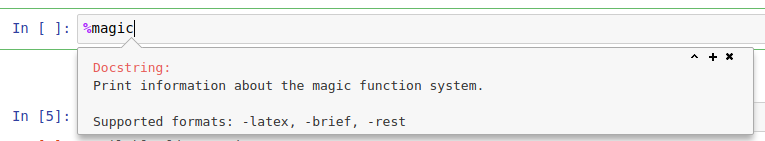

Kullanabileceğiniz bütün sihirli kelimelerin listesini `%lsmagic` sihriyle görebilirsiniz.

In [4]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

Sihirli ifadelerin kullanımının özeti ve her bir komutun kısa açıklaması için `%quickref` komutunu kullanabilirsiniz.

In [5]:
%quickref  # Jupyter ekranında ayrı bir alt pencere açar.

Bütün sihirli ifadelerin tam ve kapsamlı bir referansı için `%magic` komutunu kullanabilirsiniz.

In [6]:
%magic # Jupyter ekranında ayrı bir alt pencere açar.

**Satır sihirleri** bir tek `%` işaretiyle başlar, ve tek satırda bulunurlar. Hücrenin geri kalanında Python kodu bulunabilir. **Hücre sihirleri** ise çift `%%` işaretiyle başlarlar. Hücrenin tamamı bu sihrin etkisinde kalır.

## %time, %timeit: Süre ölçme

Bir komutun işletilmesinin ne kadar zaman aldığını ölçmek için `%time` ve `%timeit` sihirlerini kullanabiliriz. Bunlar standart kütüphanedeki `time` ve `timeit` modüllerini kullanır.

In [7]:
%time sum(range(1000))

CPU times: user 40 µs, sys: 4 µs, total: 44 µs
Wall time: 49.6 µs


499500

`%timeit` komutu, ardından gelen Python komutunu bir döngü içinde birçok defa çalıştırır, sonra ortalama süreyi bulur. Bunu birkaç defa tekrarlar ve elde ettiği sonucu ortalama ve standart sapma olarak verir. Bu şekilde bilgisayar sistemi içindeki çeşitli rastgele gecikmeleri kısmen bertaraf etmek mümkün olur.

In [8]:
%timeit sum(range(1000))

19 µs ± 2.15 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Döngü sayısı açıkça verilmediyse, otomatik olarak ayarlanır. Döngü sayısı, toplam çalışma süresi 0.2 saniyenin üstünde olacak şekilde 10'un kuvvetleri olarak belirlenir. Döngü sayısı ve tekrar sayısı istendiği gibi değiştirilebilir.

In [9]:
%timeit -n 250 -r 4 sum(range(1000))

21.2 µs ± 726 ns per loop (mean ± std. dev. of 4 runs, 250 loops each)


Bazen süresini tutmak istediğimiz işlem birkaç satıra yayılmış olabilir. O zaman bütün hücrenin işleyiş süresini tutmak için, çift yüzde işaretiyle, `%%timeit` _hücre sihiri_ kullanırız.

Örnek olarak, bir listeyi `append` ile genişletmek ve liste kurma arasındaki zaman farkına bakalım.

In [10]:
%%timeit -r 10
L = []
for i in range(1000):
    L.append(i**2)

326 µs ± 5.88 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [11]:
%timeit -r 10 [i**2 for i in range(1000)]

282 µs ± 21.7 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


## Dizin işlemleri

Yeni bir dizin yaratalım ve o dizine geçelim.

In [12]:
!mkdir deneme
%cd deneme

/home/kaan/deneme


Yeni dizinde bir dosya yaratalım.

In [13]:
!touch dosya1
!ls

dosya1


Üst dizine dönelim.

In [14]:
%cd ..

/home/kaan


Yarattığımız dizini silelim.

In [15]:
!rm -r deneme/

Neden bütün işlemleri `!` işleciyle yaparken, dizin değiştirmeyi `%cd` ile yaptık? Eğer komutu `!cd deneme` olarak verseydik, kabuk yorumlayıcı bunu işletir, ama hemen sonra kapanırdı. Sonraki her bir komut yeni bir kabuk yorumlayıcıyla yapılacağı için dizin değiştirme işlemi kalıcı olmazdı. IPython'un `%cd` komutu dizinlerin çalıştığımız ortamda kalıcı olarak değiştirilmesini sağlar.

Örnek olarak, aşağıdaki komutlar sonucunda, `/deneme` dizinine geçmiş olmuyoruz.

In [16]:
!mkdir deneme
!cd deneme
!pwd

/home/kaan


Doğrusunu yaparak `%cd` kullanırsak istediğimiz değişiklik geçerli olur.

In [17]:
%cd deneme
!pwd

/home/kaan/deneme
/home/kaan/deneme


Üst dizine geri çıkıp `/deneme` dizinini silelim.

In [18]:
%cd ..
!rm -r deneme/

/home/kaan


## %%writefile: Bir metin dosyası yaratmak

Diyelim elle yazacağınız kısa bir metni bir dosyaya kaydetmek istiyorsunuz. Bunun için ayrı bir pencerede bir editör açabilirsiniz, veya Python'un dosya açma komutlarını kullanabilirsiniz. `%%writefile` hücre sihri ise zahmetsiz kestirme bir yol sağlar.

`deneme` isimli bir dosyaya iki telefon numarası yazalım:

In [19]:
%%writefile deneme
Kaan (111)-1234567
Meral (124)-9283759

Writing deneme


`%cat` ile dosyanın içeriğini ekrana dökerek istediğimizi yaptığını teyit edebiliriz.

In [20]:
%cat deneme

Kaan (111)-1234567
Meral (124)-9283759

`%%writefile -a` ile mevcut dosyanın altına ekleme yaparız. Yeni satırla başlamak için, satır başı vermemiz gerekir.

In [21]:
%%writefile -a deneme

Ziya (234)-8087955

Appending to deneme


In [22]:
%cat deneme

Kaan (111)-1234567
Meral (124)-9283759
Ziya (234)-8087955

In [23]:
%rm deneme

## %run: Python programı çalıştırmak

Ayrı bir dosyada bulunan Python kodunu çalıştırmak için `%run` komutu kullanılır.

Basit bir Python programı hazırlayıp _merhaba.py_ ismiyle kaydedelim.

In [24]:
%%writefile merhaba.py
isim = input("Adınız?")
print("Merhaba",isim)

Overwriting merhaba.py


In [25]:
%run merhaba.py

Adınız?kaan
Merhaba kaan


Çağırılan program mevcut yorumlayıcı tarafından işlendiği için, o program içinde yaratılan değişken isimleri kalıcı olur.

In [26]:
isim

'kaan'

## Bir dosyanın içeriğini yüklemek

`%load` komutu, `%run` gibi, bir Python dosyasındaki komutları okuyup çalıştırmaya yarar. Farkı, kodu önce mevcut hücreye kopyalaması, ama biz tekrar talep etmedikçe çalıştırmamasıdır.

In [ ]:
%load merhaba.py

Yukarıdaki hücre çalıştırıldığında sihirli kelime yorum haline getirilir, dosyadaki kod aynı hücreye kopyalanır, ama çalıştırılmaz.

In [ ]:
# %load merhaba.py
isim = input("Adınız?")
print("Merhaba",isim)

Hücrede tekrar Shift-Enter'e basıldığında kod çalışır.

In [29]:
# %load merhaba.py
isim = input("Adınız?")
print("Merhaba",isim)

Adınız?kaan
Merhaba kaan


## %qtconsole: Yan terminal açmak

Defterinizin akışına müdahale etmeden bazı yan işlemler yapmak istediğinizde, ayrı bir pencerede bir IPython penceresi açabilirsiniz. (Bu komut her işletim sisteminde bulunmayabilir.)

In [30]:
%qtconsole

Her iki arayüz de aynı çekirdeğe bağlıdır. Birbirlerinin tanımlarını görebilirler. Konsol penceresini kapatmak, onu başlatan defteri etkilemez.

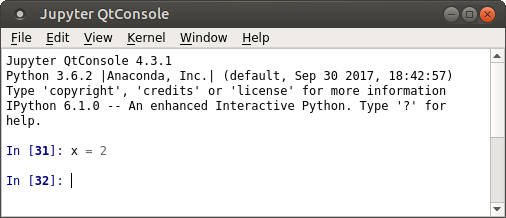

In [32]:
x

2

## %pastebin: Github'a Gist yüklemek

[_GitHub_](https://github.com/) sitesi, çok kaba bir özetle, programcıların yazdıkları kodları paylaştığı bir depo olarak tanımlanabilir. Bu sitenin altındaki [_GitHub Gist_](https://gist.github.com/) hizmeti, bir düz metin veya kod dosyasını hızlı ve formalitesiz şekilde paylaşmayı sağlar. _Gist_'ler GitHub kullanıcı adınıza bağlı veya isimsiz, ve herkese açık veya gizli olabilirler.

`%pastebin` sihri, bir dosyayı, veya mevcut oturumdan seçtiğiniz satırları isimsiz ve herkese açık bir Gist olarak yayınlar ve URL'sini döndürür.

Bu defterdeki `In[1]`-`In[11]` arası komutları Gist'e yüklemek için:

In [33]:
%pastebin -d "Deneme yüklemesi" 1-11

'https://gist.github.com/4afc1236ba56d4f7dbd17277f1817818'

_merhaba.py_ dosyasını Gist'e yüklemek için:

In [34]:
%pastebin -d "Deneme yüklemesi" merhaba.py

'https://gist.github.com/1dea182d78b7862e7206dd563cc9e643'

## %who: Oturumda tanımlanmış değişkenler

Mevcut oturumda tanımlanmış değişken isimlerini gösterir.

In [35]:
%who

bindosyalar	 isim	 x	 


Değişken isimlerini bir liste olarak almak isterseniz `%who_ls` kullanabilirsiniz.

In [36]:
%who_ls

['bindosyalar', 'isim', 'x']

## %reset: Değişkenleri topluca silmek

Mevcut oturumda kullanıcı tarafından tanımlanmış değişkenleri siler. Modüllerde tanımlanmış isimlere dokunmaz.

In [37]:
%who

bindosyalar	 isim	 x	 


In [38]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [39]:
%who

Interactive namespace is empty.


Parametreler:
* `%reset -f    :` Teyit istemeden sıfırlar.
* `%reset -s    :` Yumuşak sıfırlama: Komut geçmişi silinmez, sadece isim alanı temizlenir.
* `%reset in    :` Komut geçmişini sıfırlar.
* `%reset out   :` Çıktı geçmişini sıfırlar.
* `%reset dhist :` Dizin geçmişini sıfırlar.
* `%reset array :` Sadece NumPy dizi (array) değişkenlerini siler.

## %macro: İşlemleri otomatik olarak tekrar etmek

Arka arkaya yazdığınız birkaç komutu daha sonra tekrar tekrar işletmek için bir kenara yazmak istediğinizde `%macro` sihri işinize yarayacaktır. Bu işlem,de daha önce verdiğimiz komutları giriş sayılarını vererek bir seferde çalıştırabiliriz.

In [40]:
from random import randint

In [41]:
zar1 = randint(1,6)

In [42]:
zar2 = randint(1,6)

In [43]:
zar3 = randint(1,6)

In [44]:
a = 5

In [45]:
print(zar1 + zar2)

8


In [46]:
print(zar1, zar2, zar3, zar1+zar2+zar3)

4 4 4 12


Bu komutları kullanarak bir makro hazırlayalım. Girdi numaralarını hücrelerin yanından okuyabileceğimiz gibi, `%hist -n` sihiriyle de görebiliriz.

In [47]:
%hist -n

   1: !date
   2: !ls /bin/b*
   3:
bindosyalar = !ls /bin/b*
bindosyalar
   4: %lsmagic
   5: %quickref  # Jupyter ekranında ayrı bir alt pencere açar.
   6: %magic # Jupyter ekranında ayrı bir alt pencere açar.
   7: %time sum(range(1000))
   8: %timeit sum(range(1000))
   9: %timeit -n 250 -r 4 sum(range(1000))
  10:
%%timeit -r 10
L = []
for i in range(1000):
    L.append(i**2)
  11: %timeit -r 10 [i**2 for i in range(1000)]
  12:
!mkdir deneme
%cd deneme
  13:
!touch dosya1
!ls
  14: %cd ..
  15: !rm -r deneme/
  16:
!mkdir deneme
!cd deneme
!pwd
  17:
%cd deneme
!pwd
  18:
%cd ..
!rm -r deneme/
  19:
%%writefile deneme
Kaan (111)-1234567
Meral (124)-9283759
  20: %cat deneme
  21:
%%writefile -a deneme

Ziya (234)-8087955
  22: %cat deneme
  23: %rm deneme
  24:
%%writefile merhaba.py
isim = input("Adınız?")
print("Merhaba",isim)
  25: %run merhaba.py
  26: isim
  27: %load merhaba.py
  28:
# %load merhaba.py
isim = input("Adınız?")
print("Merhaba",isim)
  29:
# %load merhaba.py


`%macro` sihirli kelimesinden sonra, makroya vereceğiniz isim ve komut numarası aralıkları gelmelidir. Aralıklar `n1-n2 n3-n4 n5` şeklinde verilebilir. Aralıkların başı ve sonu dahil edilir. Araya virgül koyulmaz.

In [48]:
%macro zarat 41-43 46

Macro `zarat` created. To execute, type its name (without quotes).
=== Macro contents: ===
zar1 = randint(1,6)
zar2 = randint(1,6)
zar3 = randint(1,6)
print(zar1, zar2, zar3, zar1+zar2+zar3)
 

In [49]:
zarat

5 5 6 16


## %save: Komutları kaydet

Hazırladığınız bir makroyu veya girdi satırlarının bir kısmını sonraki bir oturumda kullanmak için sabit diske yazmak isterseniz `%save` sihrini kullanabilirsiniz. Parametre olarak satır numaraları aralıkları veya numara listesi verilebilir.

In [50]:
%save deneme 40-43 46

The following commands were written to file `deneme.py`:
from random import randint
zar1 = randint(1,6)
zar2 = randint(1,6)
zar3 = randint(1,6)
print(zar1, zar2, zar3, zar1+zar2+zar3)


Satır numaraları yerine daha önce hazırladığınız bir makro ismi de verebilirsiniz.

In [51]:
%save deneme zarat

File `deneme.py` exists. Overwrite (y/[N])?  y
The following commands were written to file `deneme.py`:
zar1 = randint(1,6)
zar2 = randint(1,6)
zar3 = randint(1,6)
print(zar1, zar2, zar3, zar1+zar2+zar3)



## %store: Değişkenleri sabit diske kaydet

Hesabınız sırasında ürettiğiniz bazı değişkenleri sonraki oturumlarda kullanmak için kaydetmek istediğinizde bu sihri kullanabilirsiniz.

In [52]:
L = [i*2 for i in range(10)]

In [53]:
%store L

Stored 'L' (list)


Değişkenleri silelim:

In [54]:
%reset -f

Artık _L_ listesini kaybettik.

In [55]:
print(L)

NameError: name 'L' is not defined

_L_ değişkenini kaydedilen yerden geri yükleyelim.

In [56]:
%store -r L

In [57]:
print(L)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [58]:
%store L > kareler.txt

Writing 'L' (list) to file 'kareler.txt'.


In [59]:
%cat kareler.txt

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [60]:
!rm kareler.txt

## matplotlib arayüzünü ayarlamak

_matplotlib_ Python'un gayrıresmi görselleştirme kütüphanesidir. Özel `%matplotlib` sihriyle, hangi arka yüzü kullanmak istediğinizi belirleyebilirsiniz.

In [61]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt', 'qt4', 'qt5', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl']


Bu arka yüzlerin hepsi her işletim sisteminde bulunmayabilir.

Birçok Jupyter defter kullanıcısı, defterin başında `%matplotlib inline` komutunu vermeyi tercih eder. Bu sayede ürettiğiniz matplotlib grafikleri defterin içine gömülür ve tam bir belge oluşturmanızı sağlar.

In [62]:
%matplotlib inline

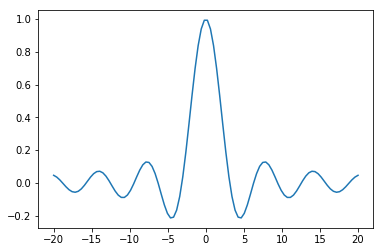

In [63]:
import matplotlib.pylab as plt
x = plt.linspace(-20,20,100)
y = plt.sin(x)/x
plt.plot(x,y)

Bunun yerine `notebook` arka yüzü kullanmayı tercih ederseniz, fareyle etkileşebileceğiniz, kaydırıp zumlayabileceğiniz dinamik bir formda gösterilir.

_Dikkat_: matplotlib arka yüzünü bir oturum içinde sadece bir kere belirleyebilirsiniz. Aşağıdaki komutlar için çekirdeği tekrar başlatmanız gerekecektir. Çekirdeği, menü çubuğunda _Kernel -> Kernel Restart_ seçerek, veya iki kere sıfıra basarak tekrar başlatabilirsiniz.

In [1]:
%matplotlib notebook

In [ ]:
import matplotlib.pylab as plt
x = plt.linspace(-20,20,100)
y = plt.sin(x)/x
plt.plot(x,y)

Deftere gömülü olarak bir etkileşimli grafik arayüzü elde ederiz.

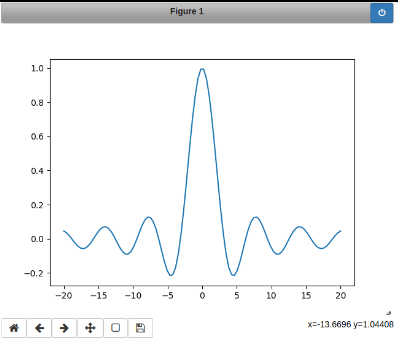

Grafiğin ayrı bir pencerede gösterilmesini istiyorsanız `gtk`, `qt`, `agg`, ve türevlerini kullanabilirsiniz. O zaman en sonda matplotlib'in `show()` komutunu vermelisiniz.

In [1]:
%matplotlib qt5

In [2]:
import matplotlib.pylab as plt
x = plt.linspace(-20,20,100)
y = plt.sin(x)/x
plt.plot(x,y)
plt.show()

Bu komutlardan sonra grafik şöyle bir pencerede gösterilir.

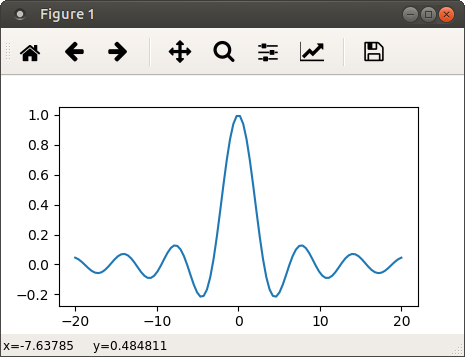

## %%script: Herhangi bir yorumlayıcıyı çalıştır

Başka dillere ait yorumlayıcıları kullanmaya ne dersiniz? Belki bir sürü veri dosyasını hızlıca işlemek için birkaç kabuk komutu vereceksiniz. Belki _Awk_, _Perl_, ya da _Ruby_ ile hızlı bir işlem yapmak istiyorsunuz. Sisteminize kurulu herhangi bir yorumlayıcıyı çalıştırıp ona komutlar vermek için `%%script` hücre sihrini kullanabilirsiniz.

Hücrenin başına `%%script`'in ardından yorumlayıcı programın adını, ve gerekiyorsa bazı parametreleri yazın. Hücredeki alt satırlar yorumlayıcıya gönderilip işlenecek, gelen cevap ekrana basılacak.

In [3]:
%%script bash
for i in 1 2 3; do
echo $i
done

1
2
3


Programın çıktısını bir değişkende saklamak için `--out <dosya adı>` parametresini kullanabilirsiniz.

In [4]:
%%script bash --out hede
for i in 1 2 3; do
echo $i
done

In [5]:
hede

'1\n2\n3\n'

## %%html: HTML yorumlayıcı

Bulunduğu hücredeki HTML kodunu işler ve HTML belgesini ekrana verir.

In [8]:
%%html
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    widtd: 100%;
}

th, td {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>
<h1> Çevrimiçi alışveriş veri kayıtları </h2>
<table class="table table-bordered table-hover table-condensed">
<thead><tr><th title="Field #1">InvoiceNo</th>
<th title="Field #2">StockCode</th>
<th title="Field #3">Description</th>
<th title="Field #4">Quantity</th>
<th title="Field #5">InvoiceDate</th>
<th title="Field #6">UnitPrice</th>
<th title="Field #7">CustomerID</th>
<th title="Field #8">Country</th>
</tr></thead>
<tbody><tr>
<td align="right">536365</td>
<td>85123A</td>
<td>WHITE HANGING HEART T-LIGHT HOLDER</td>
<td align="right">6</td>
<td>12/1/2010 8:26</td>
<td align="right">2.55</td>
<td align="right">17850</td>
<td>United Kingdom</td>
</tr>
<tr>
<td align="right">536365</td>
<td>71053</td>
<td>WHITE METAL LANTERN</td>
<td align="right">6</td>
<td>12/1/2010 8:26</td>
<td align="right">3.39</td>
<td align="right">17850</td>
<td>United Kingdom</td>
</tr>
<tr>
<td align="right">536365</td>
<td>84406B</td>
<td>CREAM CUPID HEARTS COAT HANGER</td>
<td align="right">8</td>
<td>12/1/2010 8:26</td>
<td align="right">2.75</td>
<td align="right">17850</td>
<td>United Kingdom</td>
</tr>
</tbody></table>

</body>
</html>


InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
